In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/new duplicate question folder/train.csv')

In [ ]:
df.head(10)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",1
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,0
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,1
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
df.describe()

,id,qid1,qid2,is_duplicate
count,404290.000000,404290.000000,404290.000000,404290.000000
mean,202144.500000,217243.942418,220955.655337,0.369198
std,116708.614502,157751.700002,159903.182629,0.482588
min,0.000000,1.000000,2.000000,0.000000
25%,101072.250000,74437.500000,74727.000000,0.000000
50%,202144.500000,192182.000000,197052.000000,0.000000
75%,303216.750000,346573.500000,354692.500000,1.000000
max,404289.000000,537932.000000,537933.000000,1.000000


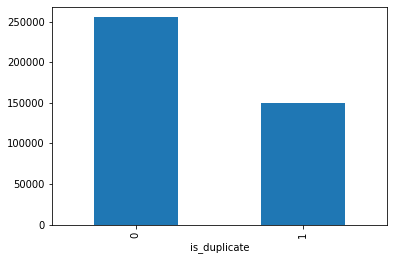

In [ ]:
df.groupby('is_duplicate')['id'].count().plot.bar()

In [ ]:
#%config Completer.use_jedi = False

In [ ]:
print(f'Total number of question pairs is : {len(df)}')

Total number of question pairs is : 404290


In [ ]:
print('Total Percentage of questions that are not similar is: {}'.format(round(100-df['is_duplicate'].mean()*100,2)))
print('Total Percentage of questions that are similar is: {}'.format(round(df['is_duplicate'].mean()*100,2)))

Total Percentage of questions that are not similar is: 63.08
Total Percentage of questions that are similar is: 36.92


In [ ]:
df['is_duplicate'].mean()

0.369197853026293

In [ ]:
quids = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())
quids
unique_qs = np.unique(quids)
len_unique_qs = len(unique_qs)
print('Length of total questions are:',len(quids))
print('Toal number of unique questions are :',len_unique_qs)
qs_morethan_one = np.sum(quids.value_counts()>1)
print('Question appearing more than once are:',(qs_morethan_one))
print('Percentage of Question appearing more than once are:',(qs_morethan_one/len(unique_qs))*100)
print('Max number of times a single question is asked:',max(quids.value_counts()))

Length of total questions are: 808580
Toal number of unique questions are : 537933
Question appearing more than once are: 111780
Percentage of Question appearing more than once are: 20.77953945937505
Max number of times a single question is asked: 157


In [ ]:
q_vals=quids.value_counts()

q_vals=q_vals.values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


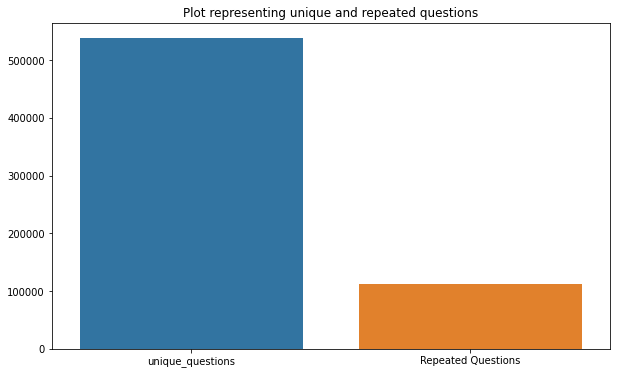

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

x = ["unique_questions" , "Repeated Questions"]
y =  [len_unique_qs , qs_morethan_one]

plt.figure(figsize=(10,6))
plt.title('Plot representing unique and repeated questions')
sns.barplot(x,y)
plt.show()

<h3>Checking for Duplicates </h3>

In [ ]:
#checking whether there are any repeated pair of questions

pair_duplicates = df[['qid1','qid2','is_duplicate']].groupby(['qid1','qid2']).count().reset_index()

print ("Number of duplicate questions",(pair_duplicates).shape[0] - df.shape[0])

Number of duplicate questions 0


Maximum number of times a single question is repeated: 157



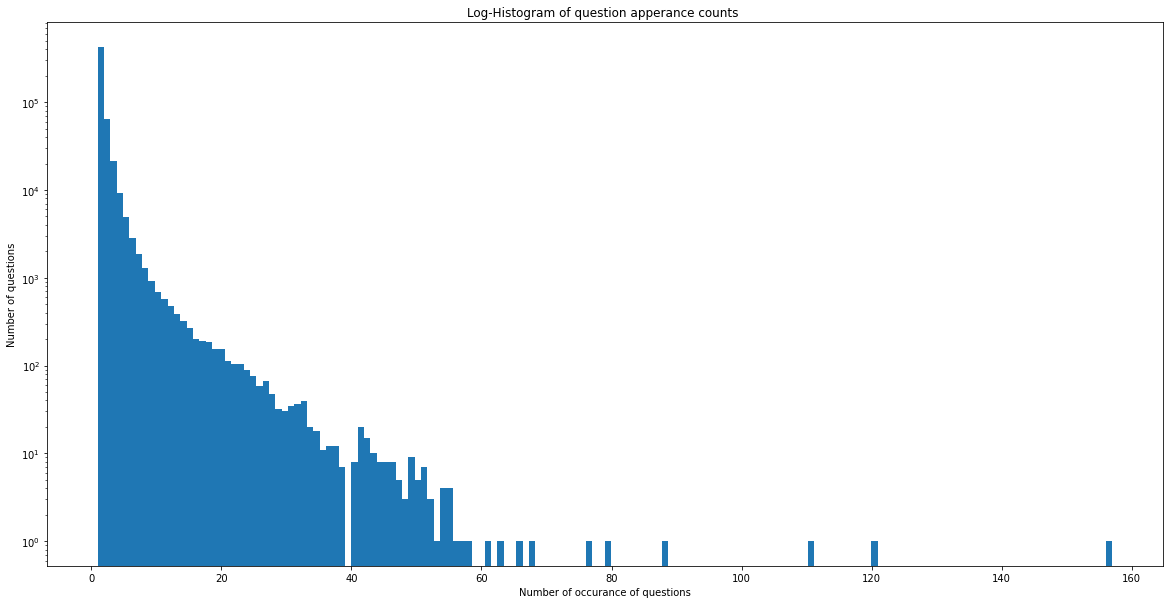

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(quids.value_counts(),bins=160)
plt.yscale('log',nonposy='clip')
plt.title('Log-Histogram of question apperance counts ')
plt.xlabel('Number of occurance of questions')
plt.ylabel('Number of questions')
print ('Maximum number of times a single question is repeated: {}\n'.format(max(quids.value_counts()))) 
plt.show()

In [ ]:
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

There are three null values we can fill with empty string

In [ ]:
df=df.fillna('')
df.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [ ]:
df[df['qid1']==3]

,id,qid1,qid2,question1,question2,is_duplicate
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
184732,184732,3,282170,What is the story of Kohinoor (Koh-i-Noor) Dia...,Is it possible to melt down diamonds?,0
263614,263614,3,380197,What is the story of Kohinoor (Koh-i-Noor) Dia...,What are some interesting facts about Kohinoor...,0
359232,359232,3,488853,What is the story of Kohinoor (Koh-i-Noor) Dia...,Could India keep the Koh-I-Noor safe?,0


In [ ]:
# Freqeuncey of qid1 and qid2

df['qid1_freq'] = df.groupby('qid1')['qid1'].transform('count')
df['qid2_freq'] = df.groupby('qid2')['qid2'].transform('count')

#Length of question1 and question2

df['q1_len'] = df['question1'].str.len()
df['q2_len'] = df['question2'].str.len()

#Number of words in question1 and question2

df['q1_words'] = df['question1'].apply(lambda x:len(x.split(' ')))
df['q2_words'] = df['question2'].apply(lambda x:len(x.split(' ')))

In [ ]:
#common words in question1 and question2
def common_words(row):
    q1_common = set(map(lambda x: x.lower().strip(),row['question1'].split(' ')))
    q2_common = set(map(lambda x: x.lower().strip(),row['question2'].split(' ')))
    return 1.0 * len(q1_common & q2_common)

df['len_common_words'] = df.apply(common_words,axis=1)

In [ ]:
#Total number of words in question1 and question2

def word_length(row):
    w1 = set(map(lambda x: x ,row['question1'].split(' ')))
    w2 = set(map(lambda x: x ,row['question2'].split(' ')))
    
    return 1.0 * (len(w1) + len(w2))

df['q1_q2_word_length'] = df.apply(word_length,axis=1)

In [ ]:
#word share of question1 and question2

df['word_share'] = df['len_common_words'] / df['q1_q2_word_length']

# qid1 and qid2 frequency sum

df['qid1_qid2_freq'] = df['qid1_freq'] + df['qid2_freq']

# difference of qid1 and qid2 frequency

df['diff_qid1_qid2'] = df['qid1_freq'] - df['qid2_freq']

In [ ]:
#save the preprocessed file
df.to_csv('df_fe_without_preprocessing_train.csv',index=False)

In [ ]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,qid1_freq,qid2_freq,q1_len,q2_len,q1_words,q2_words,len_common_words,q1_q2_word_length,word_share,qid1_qid2_freq,diff_qid1_qid2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,1,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,4,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,1,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,1,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,3,1,76,39,13,7,2.0,20.0,0.100000,4,2


# Analysis of some of the extracted features

In [ ]:
print ("Minimum length of the questions in question1 : " , min(df['q1_len']))

print ("Minimum length of the questions in question2 : " , min(df['q2_len']))

print ("Number of Questions with minimum length [question1] :", df[df['q1_len']== 1].shape[0])

print ("Number of Questions with minimum length [question2] :", df[df['q2_len']== 1].shape[0])

Minimum length of the questions in question1 :  0
Minimum length of the questions in question2 :  0
Number of Questions with minimum length [question1] : 19
Number of Questions with minimum length [question2] : 2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


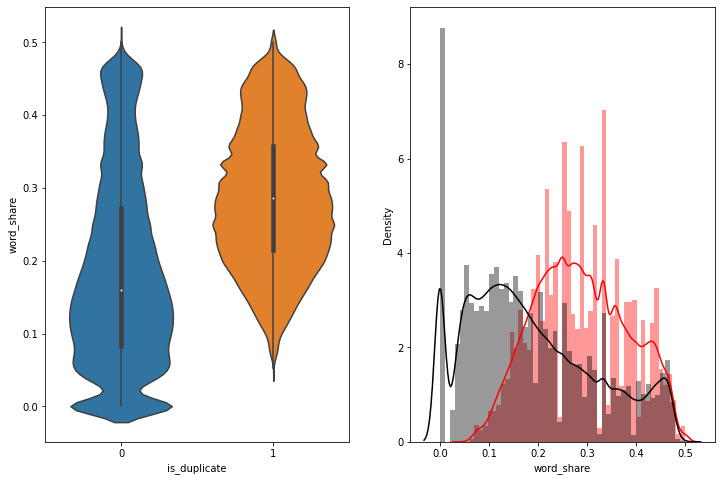

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'word_share', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_share'][0:],label = 1,color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_share'][0:],label = 0,color = 'black')

# Word Common

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


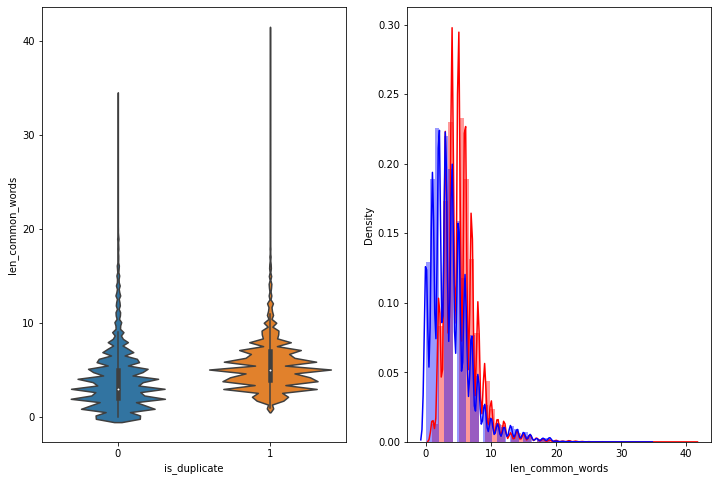

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(1,2,1)
sns.violinplot(x = 'is_duplicate', y = 'len_common_words', data = df[0:])

plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['len_common_words'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['len_common_words'][0:] , label = "0" , color = 'blue' )
plt.show()

# Training the Model for Detecting question duplicates

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import re
import keras.layers as layers
from keras.models import Model
from keras import backend as K
np.random.seed(10)
tf.compat.v1.disable_v2_behavior() 

Instructions for updating:
non-resource variables are not supported in the long term


## Using Universal Sentence Encoder - For creating embedding of text at sentence level

In [ ]:
# enabling the pretrained model for trainig our custom model using tensorflow hub
module_url = "https://tfhub.dev/google/universal-sentence-encoder-large/5"
embed = hub.load(module_url)

# creating a method for embedding and will using method for every input layer 
def UniversalEmbedding(x):
    return embed(tf.squeeze(tf.cast(x,tf.string)))
 


In [ ]:
# Taking the question1 as input and ceating a embedding for each question before feed it to neural network

dropout = 0.1
q1 = layers.Input(shape=(1,),dtype=tf.string)
embeding_q1 = layers.Lambda(UniversalEmbedding,output_shape=(512,))(q1)

# Taking the question2 as input and ceating a embedding for each question before feed it to neural network
q2 = layers.Input(shape=(1,),dtype=tf.string)
embeding_q2 = layers.Lambda(UniversalEmbedding,output_shape=(512,))(q2)

# Concatenating the both input layer
merged = layers.concatenate([embeding_q1,embeding_q2])
merged = layers.Dense(200,activation='relu')(merged)
merged = layers.Dropout(dropout)(merged)

# Normalizing the input layer,applying dense and dropout  layer for fully connected model and to avoid overfitting 
merged = layers.BatchNormalization()(merged)
merged = layers.Dense(200,activation='relu')(merged)
merged = layers.Dropout(dropout)(merged)

merged = layers.BatchNormalization()(merged)
merged = layers.Dense(200,activation='relu')(merged)
merged = layers.Dropout(dropout)(merged)

merged = layers.BatchNormalization()(merged)
merged = layers.Dense(200,activation='relu')(merged)
merged = layers.Dropout(dropout)(merged)

# Using the Sigmoid as the activation function and binary crossentropy for binary classifcation as 0 or 1
merged = layers.BatchNormalization()(merged)
pred = layers.Dense(2,activation='sigmoid')(merged)
model = Model(inputs=[q1,q2],outputs=pred)
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

The following Variables were used a Lambda layer's call (lambda), but
are not present in its tracked objects:
  <tf.Variable 'Embeddings/sharded_0:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_1:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_2:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_3:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_4:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_5:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_6:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_7:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_8:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_9:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_10:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_11:0' shape=(13334, 320) dtype=float32>


The following Variables were used a Lambda layer's call (lambda), but
are not present in its tracked objects:
  <tf.Variable 'Embeddings/sharded_0:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_1:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_2:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_3:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_4:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_5:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_6:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_7:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_8:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_9:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_10:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_11:0' shape=(13334, 320) dtype=float32>


The following Variables were used a Lambda layer's call (lambda_1), but
are not present in its tracked objects:
  <tf.Variable 'Embeddings/sharded_0:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_1:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_2:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_3:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_4:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_5:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_6:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_7:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_8:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_9:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_10:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_11:0' shape=(13334, 320) dtype=float32

The following Variables were used a Lambda layer's call (lambda_1), but
are not present in its tracked objects:
  <tf.Variable 'Embeddings/sharded_0:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_1:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_2:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_3:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_4:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_5:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_6:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_7:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_8:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_9:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_10:0' shape=(13334, 320) dtype=float32>
  <tf.Variable 'Embeddings/sharded_11:0' shape=(13334, 320) dtype=float32

Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
Colocations handled automatically by placer.


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 lambda (Lambda)                (None, 512)          0           ['input_1[0][0]']                
                                                                                                  
 lambda_1 (Lambda)              (None, 512)          0           ['input_2[0][0]']                
                                                                                              

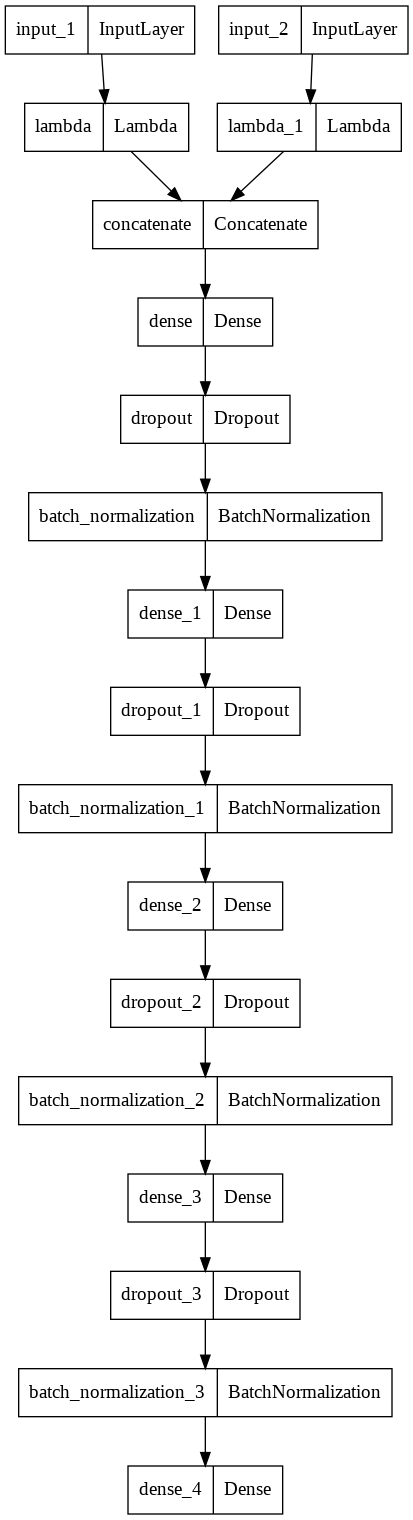

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model)

In [ ]:
# Pushing all the strings to a list and converting to ndarray
q1= df.question1.tolist()
q2= df.question2.tolist()
labels= df.is_duplicate.tolist()

In [ ]:
from sklearn.model_selection import train_test_split
X1 = df['question1']
X2 = df['question2']
y = df['is_duplicate']
# Using the sklearn to split data in question1 and question2 train and test in the ration 80-20 %
X1_train, X1_test,X2_train, X2_test, y_train, y_test = train_test_split(X1, X2, y, test_size=0.2, random_state=42)

In [ ]:
train_q1 = X1_train.tolist()
trainq1 = np.array(train_q1,dtype=object)[:,np.newaxis]
train_q2 = X2_train.tolist()
trainq2 = np.array(train_q2,dtype=object)[:,np.newaxis]

train_labels = np.asarray(pd.get_dummies(y_train),dtype=np.int8)

test_q1 = X1_test.tolist()
test_q1 = np.array(test_q1, dtype=object)[:, np.newaxis]
test_q2 = X2_test.tolist()
test_q2 = np.array(test_q2, dtype=object)[:, np.newaxis]

test_labels = np.asarray(pd.get_dummies(y_test), dtype = np.int8)


# Training the Model

In [ ]:
from keras.callbacks import ModelCheckpoint
tf.compat.v1.disable_v2_behavior() 

with tf.compat.v1.Session() as session:
    tf.compat.v1.keras.backend.set_session(session)
    session.run(tf.compat.v1.global_variables_initializer())
    session.run(tf.compat.v1.tables_initializer())
    
    filepath = 'model-{epoch:02d}-{val_acc:.2f}.hdf5'
    checkpoint = ModelCheckpoint(filepath,monitor = 'val_loss',save_best_only=False,save_weights_only=True,mode='auto',period=1)
    callback_list = [checkpoint]
    
    history = model.fit([trainq1,trainq2],train_labels,
                        validation_data=([test_q1,test_q2],test_labels),
                        epochs=10,
                        batch_size=512,callbacks=callback_list)
    model.save('final_model.h5')

Train on 323432 samples, validate on 80858 samples
Epoch 1/10
323432/323432 [==============================] - ETA: 0s - loss: 0.4739 - acc: 0.7678

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


323432/323432 [==============================] - 8599s 27ms/sample - loss: 0.4739 - acc: 0.7678 - val_loss: 0.4093 - val_acc: 0.7997
Epoch 2/10
 18432/323432 [>.............................] - ETA: 1:45:31 - loss: 0.3736 - acc: 0.8234

In [ ]:
import numpy as np
import tensorflow as tf

tf.compat.v1.disable_v2_behavior()
q1 = input("Type Question 1 here -->")
q2 = input("Type Question 2 here -->") 
q1 = np.array([[q1],[q1]])
q2 = np.array([[q2],[q2]])

# Using the same tensorflow session for embedding the test string
with tf.compat.v1.Session() as session:
    tf.compat.v1.keras.backend.set_session(session)
    session.run(tf.compat.v1.global_variables_initializer())
    session.run(tf.compat.v1.tables_initializer())
    model.load_weights('./model-09-0.86.hdf5')
    predicts = model.predict([q1,q2],verbose= 0)
    predict_logits = predicts.argmax(axis=1)
    print("----FINAL RESULT----")
    if(predict_logits[0] == 1):
        print("****Questions are Similar****")
    else:
        print("****Questions are not Similar****")

In [ ]:
import numpy as np
import tensorflow as tf

tf.compat.v1.disable_v2_behavior()
q1 = input("Type Question 1 here -->")
q2 = input("Type Question 2 here -->") 
q1 = np.array([[q1],[q1]])
q2 = np.array([[q2],[q2]])

# Using the same tensorflow session for embedding the test string
with tf.compat.v1.Session() as session:
    tf.compat.v1.keras.backend.set_session(session)
    session.run(tf.compat.v1.global_variables_initializer())
    session.run(tf.compat.v1.tables_initializer())
    model.load_weights('./model-09-0.86.hdf5')
    predicts = model.predict([q1,q2],verbose= 0)
    predict_logits = predicts.argmax(axis=1)
    print("----FINAL RESULT----")
    if(predict_logits[0] == 1):
        print("****Questions are Similar****")
    else:
        print("****Questions are not Similar****")

In [ ]:
import numpy as np
import tensorflow as tf

tf.compat.v1.disable_v2_behavior()
q1 = input("Type Question 1 here -->")
q2 = input("Type Question 2 here -->") 
q1 = np.array([[q1],[q1]])
q2 = np.array([[q2],[q2]])

# Using the same tensorflow session for embedding the test string
with tf.compat.v1.Session() as session:
    tf.compat.v1.keras.backend.set_session(session)
    session.run(tf.compat.v1.global_variables_initializer())
    session.run(tf.compat.v1.tables_initializer())
    model.load_weights('./model-09-0.86.hdf5')
    predicts = model.predict([q1,q2],verbose= 0)
    predict_logits = predicts.argmax(axis=1)
    print("----FINAL RESULT----")
    if(predict_logits[0] == 1):
        print("****Questions are Similar****")
    else:
        print("****Questions are not Similar****")

In [ ]:
history.history

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylable('accuracy')
plt.xlable('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [ ]:

plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylable('loss')
plt.xlable('epoch')
plt.legend(['train'], loc='upper left')
plt.show()